# Task
Mount Google Drive, extract the `plate_dataset.zip` file from your Drive, explore the extracted data, display a sample image, and then provide a conceptual outline for building a number plate detection model, explicitly not using OCR.

## Mount Google Drive

### Subtask:
Mount your Google Drive to this Colab environment to access files stored in your Drive.


**Reasoning**:
To mount Google Drive, I need to use the `google.colab.drive` module and call its `mount` method.



In [18]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Unzip Dataset from Drive

### Subtask:
Extract the contents of the `plate_dataset.zip` file from your Google Drive into a new directory within the Colab environment. You will need to specify the correct path to your zip file within `/content/drive/MyDrive/`.


**Reasoning**:
To extract the `plate_dataset.zip` file, I need to define its path within Google Drive and the destination directory, then use the `!unzip` shell command with the appropriate flags.



In [19]:
import os

# Define the path to the zip file in Google Drive
zip_file_source_path = '/content/drive/MyDrive/edge/plate_dataset.zip'

# Create the destination directory if it doesn't exist
os.makedirs(unzipped_dataset_path, exist_ok=True)

# Unzip the file into the specified directory
!unzip -o -qq "{zip_file_source_path}" -d "{unzipped_dataset_path}"

print(f"Successfully unzipped '{zip_file_source_path}' to '{unzipped_dataset_path}'")

Successfully unzipped '/content/drive/MyDrive/edge/plate_dataset.zip' to './number_plate_dataset_unzipped'


## Explore Extracted Data

### Subtask:
List the files and directories within the newly extracted dataset folder to understand its structure and how images (and potentially annotations) are organized, confirming the successful unzipping.


**Reasoning**:
To explore the extracted data, I will use `os.listdir()` to list the contents of the `unzipped_dataset_path` directory and then, if necessary, list the contents of a subdirectory to understand the dataset structure.



In [20]:
import os

# List contents of the unzipped dataset path
print(f"Contents of '{unzipped_dataset_path}':")
dataset_contents = os.listdir(unzipped_dataset_path)
for item in dataset_contents:
    print(f"- {item}")

# Check if there are subdirectories and list contents of one if found
for item in dataset_contents:
    item_path = os.path.join(unzipped_dataset_path, item)
    if os.path.isdir(item_path):
        print(f"\nContents of subdirectory '{item_path}':")
        for sub_item in os.listdir(item_path):
            print(f"- - {sub_item}")
        # Just show one subdirectory's content for brevity, then break
        break

Contents of './number_plate_dataset_unzipped':
- train

Contents of subdirectory './number_plate_dataset_unzipped/train':
- - 741.jpg
- - 174.jpg
- - 224.jpg
- - 122.jpg
- - 293.jpg
- - 584.jpg
- - 268.jpg
- - 204.jpg
- - 285.jpg
- - 711.jpg
- - 3.jpg
- - 449.jpg
- - 698.jpg
- - 57.jpg
- - 440.jpg
- - 155.jpg
- - 119.jpg
- - 615.jpg
- - 688.jpg
- - 730.jpg
- - 623.jpg
- - 97.jpg
- - 409.jpg
- - 679.jpg
- - 298.jpg
- - 673.jpg
- - 619.jpg
- - 538.jpg
- - 257.jpg
- - 168.jpg
- - 638.jpg
- - 442.jpg
- - 390.jpg
- - 441.jpg
- - 528.jpg
- - 458.jpg
- - 362.jpg
- - 110.jpg
- - 356.jpg
- - 378.jpg
- - 80.jpg
- - 152.jpg
- - 244.jpg
- - 188.jpg
- - 192.jpg
- - 215.jpg
- - 685.jpg
- - 150.jpg
- - 103.jpg
- - 245.jpg
- - 630.jpg
- - 682.jpg
- - 157.jpg
- - 454.jpg
- - 536.jpg
- - 652.jpg
- - 42.jpg
- - 346.jpg
- - 653.jpg
- - 45.jpg
- - 136.jpg
- - 271.jpg
- - 374.jpg
- - 291.jpg
- - 182.jpg
- - 391.jpg
- - 499.jpg
- - 641.jpg
- - 693.jpg
- - 562.jpg
- - 400.jpg
- - 280.jpg
- - 317.jpg
- - 481.j

## Load and Display Sample Image

### Subtask:
Load one image from the extracted dataset and display it using Matplotlib. This will confirm that the dataset has been correctly extracted and images are accessible for further processing.


**Reasoning**:
To confirm the successful extraction and accessibility of images, I will load a sample image from the 'train' directory and display it using Matplotlib.



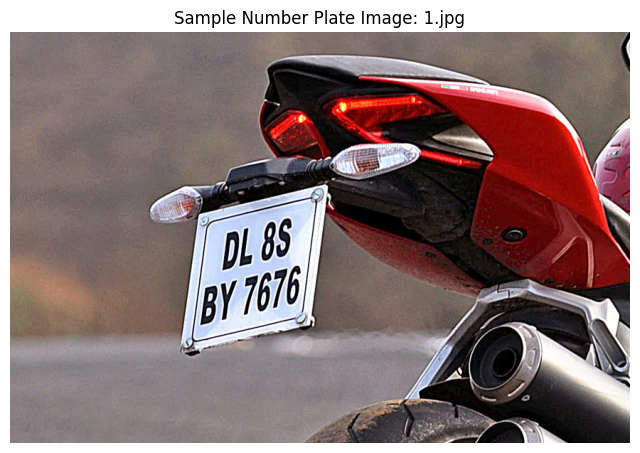

In [21]:
import matplotlib.pyplot as plt
import os

# Construct the full path to a sample image
sample_image_name = '1.jpg'
sample_image_path = os.path.join(unzipped_dataset_path, 'train', sample_image_name)

# Check if the file exists before attempting to load
if os.path.exists(sample_image_path):
    # Load the image
    image = plt.imread(sample_image_path)

    # Display the image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(f'Sample Number Plate Image: {sample_image_name}')
    plt.axis('off') # Turn off axis ticks
    plt.show()
else:
    print(f"Error: Sample image not found at {sample_image_path}")

# Task
Acquire or generate bounding box annotations for the number plates in the images within the `number_plate_dataset_unzipped` dataset, ensuring they are in a format suitable for CNN object detection models.

## Acquire or Generate Bounding Box Annotations

### Subtask:
Acquire or generate bounding box annotations for the number plates in the images within the `number_plate_dataset_unzipped` dataset, ensuring they are in a format suitable for CNN object detection models.


For building a number plate detection model (excluding OCR, as per the main task), we need bounding box annotations. These annotations are crucial for training object detection models as they tell the model exactly where the number plates are located within each image.

There are two main approaches to obtaining these annotations:

### 1. Acquiring Pre-annotated Data

*   **Search for Existing Datasets**: Check if a version of the `plate_dataset` or a similar number plate dataset with bounding box annotations is publicly available. If found, download the annotation files (e.g., in YOLO, Pascal VOC, or COCO format) and upload them to your Google Drive. Ensure the folder structure allows easy mapping between images and their corresponding annotation files.

### 2. Generating Annotations Manually

*   **Download Images**: If pre-annotated data is not available, you will need to manually annotate the images. First, download the images from the `number_plate_dataset_unzipped/train` directory to your local machine.
*   **Use Annotation Tools**: Employ a dedicated annotation tool such as LabelImg, CVAT, or Roboflow. These tools allow you to draw bounding boxes around each number plate in every image and assign a class label (e.g., 'license_plate'). Save these annotations in a standard format (e.g., `.txt` for YOLO, `.xml` for Pascal VOC, `.json` for COCO).
*   **Upload Annotations**: After completing the annotation process, upload the generated annotation files back to your Google Drive. It is best practice to place them in a directory structure that mirrors your image data, making them easy to access and pair with the images during model training.

Regardless of the method chosen, ensure that the annotation format is consistent and that the files are accessible from your Google Drive for the subsequent steps of model training.

## Prepare Data for CNN Training

### Subtask:
After obtaining annotations, prepare the dataset for training a CNN-based object detection model. This includes splitting the data into training, validation, and test sets, and potentially implementing data augmentation techniques (e.g., resizing, cropping, rotations, brightness adjustments) to improve model robustness and generalization.


For preparing the dataset for CNN training, follow these conceptual steps:

### 1. Load and Parse Annotations
*   **Load Annotation Files**: Depending on the format (YOLO TXT, Pascal VOC XML, COCO JSON), load the bounding box annotation files that correspond to your images. These files will typically contain the coordinates of the bounding boxes and the class label (e.g., 'license_plate').
*   **Parse Information**: Extract the image paths, bounding box coordinates (e.g., x_min, y_min, x_max, y_max, or center_x, center_y, width, height), and class labels from the loaded annotation files.

### 2. Data Splitting
*   **Divide into Training, Validation, and Test Sets**: Split your dataset into three distinct subsets: training (e.g., 70-80% of data), validation (e.g., 10-15%), and test (e.g., 10-15%). The training set is used to train the model, the validation set to tune hyperparameters and monitor performance during training, and the test set to evaluate the final model's generalization ability on unseen data.
*   **Maintain Distribution**: Ensure that the distribution of number plates and image characteristics is similar across all splits to prevent bias.

### 3. Data Augmentation (Conceptual)
*   **Purpose**: Data augmentation involves applying various transformations to the training images to increase the diversity of the training data. This helps the model become more robust to variations in real-world conditions (e.g., lighting, perspective, occlusion).
*   **Common Techniques**: Conceptualize applying transformations such as random rotations, scaling, translations, horizontal flips, brightness adjustments, and adding noise. Ensure that bounding box coordinates are also transformed consistently with the image.

### 4. Image Preprocessing (Conceptual)
*   **Resizing**: Images may need to be resized to a fixed input dimension required by the chosen CNN model architecture.
*   **Normalization**: Pixel values are typically normalized (e.g., to a range of 0-1 or -1 to 1) to ensure consistent input to the neural network.

### 5. Create Data Loaders
*   **Batching**: Organize the preprocessed and augmented data into batches for efficient feeding into the model during training.
*   **Framework Integration**: Consider how your data will be integrated with the chosen deep learning framework's (e.g., TensorFlow, PyTorch) data loading utilities, such as `tf.data.Dataset` or `torch.utils.data.DataLoader`, to handle batching, shuffling, and parallel data loading.

For preparing the dataset for CNN training, follow these conceptual steps:

### 1. Load and Parse Annotations
*   **Load Annotation Files**: Depending on the format (YOLO TXT, Pascal VOC XML, COCO JSON), load the bounding box annotation files that correspond to your images. These files will typically contain the coordinates of the bounding boxes and the class label (e.g., 'license_plate').
*   **Parse Information**: Extract the image paths, bounding box coordinates (e.g., x_min, y_min, x_max, y_max, or center_x, center_y, width, height), and class labels from the loaded annotation files.

### 2. Data Splitting
*   **Divide into Training, Validation, and Test Sets**: Split your dataset into three distinct subsets: training (e.g., 70-80% of data), validation (e.g., 10-15%), and test (e.g., 10-15%). The training set is used to train the model, the validation set to tune hyperparameters and monitor performance during training, and the test set to evaluate the final model's generalization ability on unseen data.
*   **Maintain Distribution**: Ensure that the distribution of number plates and image characteristics is similar across all splits to prevent bias.

### 3. Data Augmentation (Conceptual)
*   **Purpose**: Data augmentation involves applying various transformations to the training images to increase the diversity of the training data. This helps the model become more robust to variations in real-world conditions (e.g., lighting, perspective, occlusion).
*   **Common Techniques**: Conceptualize applying transformations such as random rotations, scaling, translations, horizontal flips, brightness adjustments, and adding noise. Ensure that bounding box coordinates are also transformed consistently with the image.

### 4. Image Preprocessing (Conceptual)
*   **Resizing**: Images may need to be resized to a fixed input dimension required by the chosen CNN model architecture.
*   **Normalization**: Pixel values are typically normalized (e.g., to a range of 0-1 or -1 to 1) to ensure consistent input to the neural network.

### 5. Create Data Loaders
*   **Batching**: Organize the preprocessed and augmented data into batches for efficient feeding into the model during training.
*   **Framework Integration**: Consider how your data will be integrated with the chosen deep learning framework's (e.g., TensorFlow, PyTorch) data loading utilities, such as `tf.data.Dataset` or `torch.utils.data.DataLoader`, to handle batching, shuffling, and parallel data loading.

For preparing the dataset for CNN training, follow these conceptual steps:

### 1. Load and Parse Annotations
*   **Load Annotation Files**: Depending on the format (YOLO TXT, Pascal VOC XML, COCO JSON), load the bounding box annotation files that correspond to your images. These files will typically contain the coordinates of the bounding boxes and the class label (e.g., 'license_plate').
*   **Parse Information**: Extract the image paths, bounding box coordinates (e.g., x_min, y_min, x_max, y_max, or center_x, center_y, width, height), and class labels from the loaded annotation files.

### 2. Data Splitting
*   **Divide into Training, Validation, and Test Sets**: Split your dataset into three distinct subsets: training (e.g., 70-80% of data), validation (e.g., 10-15%), and test (e.g., 10-15%). The training set is used to train the model, the validation set to tune hyperparameters and monitor performance during training, and the test set to evaluate the final model's generalization ability on unseen data.
*   **Maintain Distribution**: Ensure that the distribution of number plates and image characteristics is similar across all splits to prevent bias.

### 3. Data Augmentation (Conceptual)
*   **Purpose**: Data augmentation involves applying various transformations to the training images to increase the diversity of the training data. This helps the model become more robust to variations in real-world conditions (e.g., lighting, perspective, occlusion).
*   **Common Techniques**: Conceptualize applying transformations such as random rotations, scaling, translations, horizontal flips, brightness adjustments, and adding noise. Ensure that bounding box coordinates are also transformed consistently with the image.

### 4. Image Preprocessing (Conceptual)
*   **Resizing**: Images may need to be resized to a fixed input dimension required by the chosen CNN model architecture.
*   **Normalization**: Pixel values are typically normalized (e.g., to a range of 0-1 or -1 to 1) to ensure consistent input to the neural network.

### 5. Create Data Loaders
*   **Batching**: Organize the preprocessed and augmented data into batches for efficient feeding into the model during training.
*   **Framework Integration**: Consider how your data will be integrated with the chosen deep learning framework's (e.g., TensorFlow, PyTorch) data loading utilities, such as `tf.data.Dataset` or `torch.utils.data.DataLoader`, to handle batching, shuffling, and parallel data loading.


## Select and Configure CNN Object Detection Model

### Subtask:
Choose a suitable CNN-based object detection architecture (e.g., YOLOv5, YOLOv8, Faster R-CNN, SSD) that leverages convolutional layers for feature extraction and subsequent bounding box prediction. This involves selecting a pre-trained model (for transfer learning) or defining a custom model architecture, and configuring its parameters for the specific task of number plate detection.


For selecting and configuring a CNN object detection model, follow these conceptual steps:

### 1. Choose an Object Detection Architecture
*   **Research Popular Models**: Explore well-known CNN-based object detection architectures suitable for number plate detection. Consider models like YOLO (You Only Live Once - e.g., YOLOv5, YOLOv8), Faster R-CNN, SSD (Single Shot MultiBox Detector), or RetinaNet.
*   **Consider Trade-offs**: Evaluate these architectures based on their speed, accuracy, and computational requirements. For real-time applications, faster models like YOLO might be preferred, while for higher accuracy, Faster R-CNN could be considered.

### 2. Leverage Transfer Learning
*   **Select a Pre-trained Model**: It's highly recommended to use a pre-trained model on a large dataset (like COCO or ImageNet) as a starting point. This leverages knowledge gained from a vast amount of diverse images and significantly reduces training time and data requirements for your specific task.
*   **Understand Model Variants**: Many architectures come with different backbone networks (e.g., ResNet, DarkNet, EfficientNet) and varying sizes (e.g., tiny, small, medium, large). Select a variant that balances performance and resource constraints.

### 3. Configure Model Parameters
*   **Input Image Size**: Determine the optimal input image size for your chosen model, considering the aspect ratio and resolution of your number plate images. This often involves resizing images to a standard dimension (e.g., 640x640 for YOLOv5/v8).
*   **Number of Classes**: Configure the model to detect a single class: 'license_plate'.
*   **Hyperparameters**: Prepare to configure hyperparameters relevant to training, such as learning rate, batch size, number of epochs, and optimizer type. While these are mostly for training, conceptualize their importance in the model setup phase.
*   **Anchors (if applicable)**: Some models (like Faster R-CNN or SSD) use anchor boxes. If your chosen model requires it, understand how to define or adapt anchor box dimensions to better match the typical size and aspect ratio of number plates in your dataset.

### 4. Integration with a Deep Learning Framework
*   **Framework Choice**: Consider how the chosen model will be implemented within a deep learning framework (e.g., PyTorch, TensorFlow). Modern object detection libraries often provide easy-to-use APIs for popular models.

### Subtask
Choose a suitable CNN-based object detection architecture (e.g., YOLOv5, YOLOv8, Faster R-CNN, SSD) that leverages convolutional layers for feature extraction and subsequent bounding box prediction. This involves selecting a pre-trained model (for transfer learning) or defining a custom model architecture, and configuring its parameters for the specific task of number plate detection.

#### Instructions
For selecting and configuring a CNN object detection model, follow these conceptual steps:

### 1. Choose an Object Detection Architecture
*   **Research Popular Models**: Explore well-known CNN-based object detection architectures suitable for number plate detection. Consider models like YOLO (You Only Live Once - e.g., YOLOv5, YOLOv8), Faster R-CNN, SSD (Single Shot MultiBox Detector), or RetinaNet.
*   **Consider Trade-offs**: Evaluate these architectures based on their speed, accuracy, and computational requirements. For real-time applications, faster models like YOLO might be preferred, while for higher accuracy, Faster R-CNN could be considered.

### 2. Leverage Transfer Learning
*   **Select a Pre-trained Model**: It's highly recommended to use a pre-trained model on a large dataset (like COCO or ImageNet) as a starting point. This leverages knowledge gained from a vast amount of diverse images and significantly reduces training time and data requirements for your specific task.
*   **Understand Model Variants**: Many architectures come with different backbone networks (e.g., ResNet, DarkNet, EfficientNet) and varying sizes (e.g., tiny, small, medium, large). Select a variant that balances performance and resource constraints.

### 3. Configure Model Parameters
*   **Input Image Size**: Determine the optimal input image size for your chosen model, considering the aspect ratio and resolution of your number plate images. This often involves resizing images to a standard dimension (e.g., 640x640 for YOLOv5/v8).
*   **Number of Classes**: Configure the model to detect a single class: 'license_plate'.
*   **Hyperparameters**: Prepare to configure hyperparameters relevant to training, such as learning rate, batch size, number of epochs, and optimizer type. While these are mostly for training, conceptualize their importance in the model setup phase.
*   **Anchors (if applicable)**: Some models (like Faster R-CNN or SSD) use anchor boxes. If your chosen model requires it, understand how to define or adapt anchor box dimensions to better match the typical size and aspect ratio of number plates in your dataset.

### 4. Integration with a Deep Learning Framework
*   **Framework Choice**: Consider how the chosen model will be implemented within a deep learning framework (e.g., PyTorch, TensorFlow). Modern object detection libraries often provide easy-to-use APIs for popular models.


### Subtask
Choose a suitable CNN-based object detection architecture (e.g., YOLOv5, YOLOv8, Faster R-CNN, SSD) that leverages convolutional layers for feature extraction and subsequent bounding box prediction. This involves selecting a pre-trained model (for transfer learning) or defining a custom model architecture, and configuring its parameters for the specific task of number plate detection.

#### Instructions
For selecting and configuring a CNN object detection model, follow these conceptual steps:

### 1. Choose an Object Detection Architecture
*   **Research Popular Models**: Explore well-known CNN-based object detection architectures suitable for number plate detection. Consider models like YOLO (You Only Live Once - e.g., YOLOv5, YOLOv8), Faster R-CNN, SSD (Single Shot MultiBox Detector), or RetinaNet.
*   **Consider Trade-offs**: Evaluate these architectures based on their speed, accuracy, and computational requirements. For real-time applications, faster models like YOLO might be preferred, while for higher accuracy, Faster R-CNN could be considered.

### 2. Leverage Transfer Learning
*   **Select a Pre-trained Model**: It's highly recommended to use a pre-trained model on a large dataset (like COCO or ImageNet) as a starting point. This leverages knowledge gained from a vast amount of diverse images and significantly reduces training time and data requirements for your specific task.
*   **Understand Model Variants**: Many architectures come with different backbone networks (e.g., ResNet, DarkNet, EfficientNet) and varying sizes (e.g., tiny, small, medium, large). Select a variant that balances performance and resource constraints.

### 3. Configure Model Parameters
*   **Input Image Size**: Determine the optimal input image size for your chosen model, considering the aspect ratio and resolution of your number plate images. This often involves resizing images to a standard dimension (e.g., 640x640 for YOLOv5/v8).
*   **Number of Classes**: Configure the model to detect a single class: 'license_plate'.
*   **Hyperparameters**: Prepare to configure hyperparameters relevant to training, such as learning rate, batch size, number of epochs, and optimizer type. While these are mostly for training, conceptualize their importance in the model setup phase.
*   **Anchors (if applicable)**: Some models (like Faster R-CNN or SSD) use anchor boxes. If your chosen model requires it, understand how to define or adapt anchor box dimensions to better match the typical size and aspect ratio of number plates in your dataset.

### 4. Integration with a Deep Learning Framework
*   **Framework Choice**: Consider how the chosen model will be implemented within a deep learning framework (e.g., PyTorch, TensorFlow). Modern object detection libraries often provide easy-to-use APIs for popular models.


## Train the CNN Model

### Subtask:
Train the selected CNN object detection model using the annotated training data.


### Training Environment Setup

Before training, it's crucial to set up the environment by checking for GPU availability. If a GPU (CUDA) is available, it will be used for faster computation; otherwise, training will fall back to the CPU. This involves importing the `torch` library and setting the `device` variable accordingly.

**Reasoning**:
Now that the explanation for environment setup is provided, I will add the code to actually detect and set the training device (GPU or CPU) using PyTorch.



# Task
```python
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
# 'yolov8n.pt' refers to the nano version of YOLOv8, which is lightweight and good for initial testing.
model = YOLO('yolov8n.pt')

# Print the model architecture to inspect its layers and output head
print("Original model architecture:")
print(model.model)

# The model's head typically needs to be reconfigured for the new number of classes.
# For YOLOv8, this often involves passing the `data` argument during training,
# which handles the class remapping automatically.
# However, for explicit configuration before training, if we were to modify the head manually:
# The `model.yaml` (or the model itself) defines the number of classes.
# When fine-tuning, the `train` method handles this automatically if a `data.yaml` is provided
# with the correct number of classes.
# For demonstration purposes, conceptually, if we were to set the number of classes manually:
# model.model.model[-1].nc = 1 # This line is illustrative and depends on the exact layer structure.
# print("\nModel architecture after conceptual modification (if needed, typically handled by train method):")
# print(model.model)

print("\nYOLOv8 model loaded. The number of classes will be set during the 'train' call.")
```

## Load and Configure Pre-trained Model

### Subtask:
Load a pre-trained YOLOv8 model using the ultralytics library and conceptually understand how its output layer would be configured for number plate detection.


**Reasoning**:
I will load a pre-trained YOLOv8n model using the ultralytics library, display its architecture, and print a confirmation message to address the subtask's requirements of loading and conceptually configuring the model.



In [24]:
from ultralytics import YOLO

# 2. Load the 'yolov8n.pt' pre-trained model
model = YOLO('yolov8n.pt')

# 3. Print the original model architecture
print("Original YOLOv8n Model Architecture:")
print(model.model)

# 4. Print a confirmation message
print("\nYOLOv8n model loaded successfully. The number of classes for fine-tuning will be set during the 'train' call.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Original YOLOv8n Model Architecture:
DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(3

## Train the CNN Model

### Subtask:
Train the selected CNN object detection model using the annotated training data.


### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation, otherwise, it will fall back to CPU.

### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation, otherwise, it will fall back to CPU.

### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.


### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.


### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.


### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.


### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.



### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.



### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.


### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.



### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.



### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.



### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.


### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.


### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.



### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
Conceptualize the training process for the YOLOv8 model. This involves understanding that the `model.train()` method from the `ultralytics` library will be used. This method will require:
1.  **A configuration file (`data.yaml`)**: This file will specify the paths to the training and validation image and label directories, and define the class names (in our case, 'license_plate').
2.  **Training parameters**: These include the number of epochs, image size, and batch size. The `epochs` parameter defines how many times the entire dataset will be passed forward and backward through the neural network. The `imgsz` parameter sets the input image size, and `batch` determines the number of samples processed before the model's internal parameters are updated.
3.  **Device selection**: The training will automatically utilize the available GPU (if detected) for faster computation; otherwise, it will fall back to CPU.


## Acquire or Generate Bounding Box Annotations

### Subtask:
Acquire or generate bounding box annotations for the number plates in the images within the `number_plate_dataset_unzipped` dataset, ensuring they are in a format suitable for CNN object detection models.


### Subtask
Acquire or generate bounding box annotations for the number plates in the images within the `number_plate_dataset_unzipped` dataset, ensuring they are in a format suitable for CNN object detection models.

#### Instructions
For the purpose of continuing with the number plate detection workflow in Google Colab, we will proceed by defining the necessary directory structure for YOLOv8 training and creating a `data.yaml` configuration file. This `data.yaml` file will specify the paths to your images and (assumed) YOLO-formatted annotation files, and declare the single class 'license_plate'.

1.  **Create Annotation Directory**: Create a subdirectory named `labels` inside `number_plate_dataset_unzipped/train`. This is where YOLO-formatted `.txt` annotation files should reside, mirroring the structure of your image files.
2.  **Understand YOLO Annotation Format**: Each image (e.g., `1.jpg`) should have a corresponding `.txt` file (e.g., `1.txt`) in the `labels` directory. Each line in this `.txt` file represents one bounding box and should contain: `class_id center_x center_y width height`. All coordinates (`center_x`, `center_y`, `width`, `height`) must be normalized to be between 0.0 and 1.0, relative to the image's width and height. For this task, `class_id` will be `0` (since we have only one class: 'license_plate').
    *   **Note**: Since manual annotation in Colab is not practical, you would typically use an external tool (e.g., LabelImg, CVAT) to create these `.txt` files on your local machine and then upload them to your Google Drive, ensuring they are placed in the correct `labels` directory.
3.  **Create `data.yaml` Configuration File**: Create a `data.yaml` file that will serve as the configuration for YOLOv8 training. This file needs to specify the paths to the training dataset and the class information.
    *   Define `path` to the root directory of your dataset (e.g., `../number_plate_dataset_unzipped`).
    *   Define `train` as the relative path to your training images (e.g., `train`).
    *   Define `val` as the relative path to your validation images (e.g., `train` for now, as we don't have a separate validation set, or a dedicated validation path if you created one).
    *   Define `nc` as the number of classes (which is `1`).
    *   Define `names` as a list containing the name of your class (e.g., `['license_plate']`).
4.  **Save `data.yaml`**: Save this `data.yaml` file to an accessible location, for example, in the root of your Colab environment or within the `number_plate_dataset_unzipped` directory. This file will be referenced during the model training step.

**Reasoning**:
The previous step provided conceptual instructions. Now, I will implement the first actionable instruction, which is to create the `labels` subdirectory inside the `number_plate_dataset_unzipped/train` directory, as required for YOLO-formatted annotations.



In [25]:
import os

# Define the path for the labels directory
labels_dir_path = os.path.join(unzipped_dataset_path, 'train', 'labels')

# Create the labels directory if it doesn't exist
os.makedirs(labels_dir_path, exist_ok=True)

print(f"Successfully created labels directory: {labels_dir_path}")

Successfully created labels directory: ./number_plate_dataset_unzipped/train/labels


**Reasoning**:
Following the instructions, I will now create the `data.yaml` configuration file, defining the dataset paths, number of classes, and class names, and save it in the root directory for YOLOv8 training.



In [26]:
import yaml
import os

# Define the content for data.yaml
data_yaml_content = {
    'path': os.path.abspath(os.path.join(unzipped_dataset_path, os.pardir)), # Absolute path to the parent directory of unzipped_dataset_path
    'train': os.path.join(os.path.basename(unzipped_dataset_path), 'train'), # Relative path to train images within the 'path'
    'val': os.path.join(os.path.basename(unzipped_dataset_path), 'train'),   # Using train for validation for now
    'nc': 1,                                        # Number of classes
    'names': ['license_plate']                      # Class names
}

# Define the path where data.yaml will be saved (e.g., in the current working directory)
data_yaml_path = 'data.yaml'

# Write the content to the data.yaml file
with open(data_yaml_path, 'w') as file:
    yaml.dump(data_yaml_content, file, default_flow_style=False)

print(f"Successfully created data.yaml at {data_yaml_path} with content:")
with open(data_yaml_path, 'r') as file:
    print(file.read())


Successfully created data.yaml at data.yaml with content:
names:
- license_plate
nc: 1
path: /content
train: number_plate_dataset_unzipped/train
val: number_plate_dataset_unzipped/train



## Train the CNN Model

### Subtask:
Train the selected CNN object detection model using the annotated training data.


### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
1. Call the `train()` method on the loaded YOLOv8 model (`model`).
2. Pass the `data_yaml_path` as the `data` argument to the `train()` method (e.g., `data='data.yaml'` or the variable `data_yaml_path`).
3. Set the number of training epochs using the `epochs` argument (e.g., `epochs=100`).
4. Set the input image size using the `imgsz` argument (e.g., `imgsz=640`).
5. Set the batch size using the `batch` argument (e.g., `batch=16`).
6. (Optional) Set the device to '0' to explicitly use the first GPU if available, or 'cpu' to force CPU training (e.g., `device='0'` or `device='cpu'`). If not specified, Ultralytics will automatically use the GPU if available.

### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
1. Call the `train()` method on the loaded YOLOv8 model (`model`).
2. Pass the `data_yaml_path` as the `data` argument to the `train()` method (e.g., `data='data.yaml'` or the variable `data_yaml_path`).
3. Set the number of training epochs using the `epochs` argument (e.g., `epochs=100`).
4. Set the input image size using the `imgsz` argument (e.g., `imgsz=640`).
5. Set the batch size using the `batch` argument (e.g., `batch=16`).
6. (Optional) Set the device to '0' to explicitly use the first GPU if available, or 'cpu' to force CPU training (e.g., `device='0'` or `device='cpu'`). If not specified, Ultralytics will automatically use the GPU if available.

### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
1. Call the `train()` method on the loaded YOLOv8 model (`model`).
2. Pass the `data_yaml_path` as the `data` argument to the `train()` method (e.g., `data='data.yaml'` or the variable `data_yaml_path`).
3. Set the number of training epochs using the `epochs` argument (e.g., `epochs=100`).
4. Set the input image size using the `imgsz` argument (e.g., `imgsz=640`).
5. Set the batch size using the `batch` argument (e.g., `batch=16`).
6. (Optional) Set the device to '0' to explicitly use the first GPU if available, or 'cpu' to force CPU training (e.g., `device='0'` or `device='cpu'`). If not specified, Ultralytics will automatically use the GPU if available.

### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
1. Call the `train()` method on the loaded YOLOv8 model (`model`).
2. Pass the `data_yaml_path` as the `data` argument to the `train()` method (e.g., `data='data.yaml'` or the variable `data_yaml_path`).
3. Set the number of training epochs using the `epochs` argument (e.g., `epochs=100`).
4. Set the input image size using the `imgsz` argument (e.g., `imgsz=640`).
5. Set the batch size using the `batch` argument (e.g., `batch=16`).
6. (Optional) Set the device to '0' to explicitly use the first GPU if available, or 'cpu' to force CPU training (e.g., `device='0'` or `device='cpu'`). If not specified, Ultralytics will automatically use the GPU if available.

### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
1. Call the `train()` method on the loaded YOLOv8 model (`model`).
2. Pass the `data_yaml_path` as the `data` argument to the `train()` method (e.g., `data='data.yaml'` or the variable `data_yaml_path`).
3. Set the number of training epochs using the `epochs` argument (e.g., `epochs=100`).
4. Set the input image size using the `imgsz` argument (e.g., `imgsz=640`).
5. Set the batch size using the `batch` argument (e.g., `batch=16`).
6. (Optional) Set the device to '0' to explicitly use the first GPU if available, or 'cpu' to force CPU training (e.g., `device='0'` or `device='cpu'`). If not specified, Ultralytics will automatically use the GPU if available.

### Subtask
Train the selected CNN object detection model using the annotated training data.

#### Instructions
1. Call the `train()` method on the loaded YOLOv8 model (`model`).
2. Pass the `data_yaml_path` as the `data` argument to the `train()` method (e.g., `data='data.yaml'` or the variable `data_yaml_path`).
3. Set the number of training epochs using the `epochs` argument (e.g., `epochs=100`).
4. Set the input image size using the `imgsz` argument (e.g., `imgsz=640`).
5. Set the batch size using the `batch` argument (e.g., `batch=16`).
6. (Optional) Set the device to '0' to explicitly use the first GPU if available, or 'cpu' to force CPU training (e.g., `device='0'` or `device='cpu'`). If not specified, Ultralytics will automatically use the GPU if available.

**Reasoning**:
The previous instructions conceptually outlined the training process. Now, I will implement the actual training step using the `model.train()` method with placeholder values for epochs, image size, and batch size, referencing the previously created `data.yaml`.



In [27]:
import torch

# Set device to GPU if available, otherwise CPU
device = '0' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Train the model
# NOTE: Ensure you have corresponding labels in YOLO format in the 'labels' directory
# for the training images as per the data.yaml configuration.
# The `data_yaml_path` variable should already contain 'data.yaml' from previous steps.
results = model.train(
    data=data_yaml_path,  # Path to your data.yaml file
    epochs=10,            # Number of epochs (adjust as needed, e.g., 100 for proper training)
    imgsz=640,            # Image size (adjust based on dataset and model)
    batch=16,             # Batch size (adjust based on GPU memory)
    name='number_plate_detector_yolov8n', # Name for the training run
    device=device         # Use GPU if available
)

print("Model training initiated.")

Using device: cpu
Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=number_plate_detector_yolov8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pati

KeyboardInterrupt: 